# Analisis de empleados que abandonan una Empresa

## Librerias

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cargar datos

In [59]:
df = pd.read_csv('./AbandonoEmpleados.csv', sep=';', index_col='id', na_values='#N/D')

In [60]:
# dataframe con los 5 primeros registros
df.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2


In [61]:
# lista con el nomnre de las columnas
df.columns

Index(['edad', 'abandono', 'viajes', 'departamento', 'distancia_casa',
       'educacion', 'carrera', 'empleados', 'satisfaccion_entorno', 'sexo',
       'implicacion', 'nivel_laboral', 'puesto', 'satisfaccion_trabajo',
       'estado_civil', 'salario_mes', 'num_empresas_anteriores', 'mayor_edad',
       'horas_extra', 'incremento_salario_porc', 'evaluacion',
       'satisfaccion_companeros', 'horas_quincena', 'nivel_acciones',
       'anos_experiencia', 'num_formaciones_ult_ano', 'conciliacion',
       'anos_compania', 'anos_en_puesto', 'anos_desde_ult_promocion',
       'anos_con_manager_actual'],
      dtype='object')

In [62]:
# informacion de las columnas del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

## Analisis de Valores Nulos

In [63]:
df.isna().sum().sort_values(ascending=False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

- Debido a la gran cantidad de valores nulos en los campos anos_en_puesto y conciliacion no nos sirve para el analisis por lo que lo el eliminamos del dataframe.

- Los campos sexo, educacion, satisfaccion_trabajo e implicacion con valores nulos seran tratados mediante EDA para imputarlos. Esto se puede hacer ya que los valores faltantes de las variables no superan el 20% del total de los datos

In [64]:
# eliminar columnas no utiles para el analisis
df.drop(columns=['anos_en_puesto', 'conciliacion'], inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

## EDA para variables categoricas

In [66]:
# EDa para variables categoricas
def graph_EDA_categorias(frame):

    # calcular numero de filas
    from math import ceil
    filas = ceil(frame.shape[1]/2)

    # definimos el grafico
    f, ax = plt.subplots(nrows=filas, ncols=2, figsize = (16, filas*16))

    # aplanamos el grafico
    ax = ax.flat

    # creamos el bucle
    for cada, variable in enumerate(frame):
        frame[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = 'bold')
        ax[cada].tick_params(labelsize = 12) 

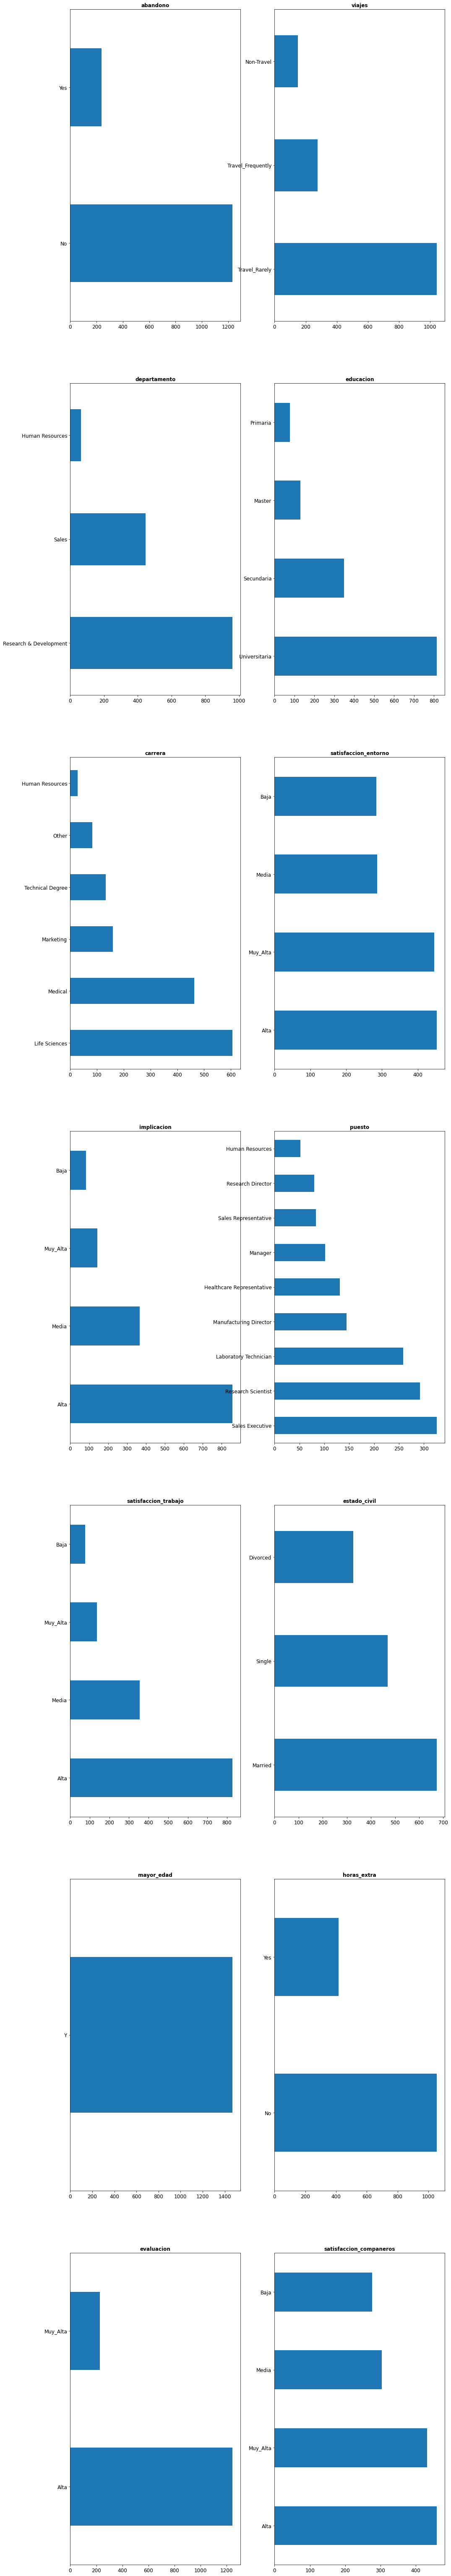

In [67]:
# llamamos la funcion y pasamos las variables categoricas del df
graph_EDA_categorias(df.select_dtypes('O'))

### Conclusiones de las Graficas
- La variable mayor_edad solo tiene un valor y como vemos todos los empleados son mayor, por tanto, no es relevante para el analisis y podemos sacarla de dataframe

- La variable educacion posee valores faltantes que representan menos del 20% por lo que podemos aplicarle un metodo de imputacion. Al chequear la grafica EDA vemos que la opcion 'Universitario' es la mas predominante por lo que reemplazamos los valores faltantes por este valor.

- Lo mismo aplicamos a las variables satisfaccion_trabajo donde reemplazamos los missing por el valor predominante que es 'Alta' y en implicacion donde reemplazamos los missing por el valor 'Alta'

In [68]:
# eliminar variable mayor_edad
df.drop(columns='mayor_edad', inplace=True)

In [69]:
# imputar valores de educacion
df['educacion'] = df['educacion'].fillna('Universitaria')

In [70]:
# imputar valores de satisfaccion_trabajo
df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')

In [71]:
# imputar valores de implicacion
df['implicacion'] = df['implicacion'].fillna('Alta')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1470 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1470 non-null   object 
 14  estado_c

## EDA para variables numericas

In [73]:
#funcion estadistica para variable numericas
def estadistico_cont(frame):
    
    # describe de cada variable en formato tabular
    estadisticos = frame.describe().T

    # calculamos la mediana
    estadisticos['median'] = frame.median()

    # reordenamos valores
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]

    # devolver resultados
    return estadisticos

In [74]:
estadistico_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


### Conclusiones de las tablas

- La variable empleado solo tiene un valor, por tanto, no es relevante para el analisis.

- Sexo tiene 4 valores. Al no tener informacion sobre lo que representa cada valor no podemos utilizar dicha variable por lo que la sacamos del dataframe.

- La variable horas_quincena solamente tiene un valor, lo cual no nos brinda informacion relevante para el analisis.

In [75]:
# eliminar variable empleado, sexo, horas_quincena
df.drop(columns=['empleados', 'sexo', 'horas_quincena'], inplace=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edad                      1470 non-null   int64 
 1   abandono                  1470 non-null   object
 2   viajes                    1470 non-null   object
 3   departamento              1470 non-null   object
 4   distancia_casa            1470 non-null   int64 
 5   educacion                 1470 non-null   object
 6   carrera                   1470 non-null   object
 7   satisfaccion_entorno      1470 non-null   object
 8   implicacion               1470 non-null   object
 9   nivel_laboral             1470 non-null   int64 
 10  puesto                    1470 non-null   object
 11  satisfaccion_trabajo      1470 non-null   object
 12  estado_civil              1470 non-null   object
 13  salario_mes               1470 non-null   int64 
 14  num_empresas_anteriores 

## Generacion de Insight

### Cual es la tasa de abandono?

In [77]:
df.abandono.value_counts(normalize=True)*100

No     83.877551
Yes    16.122449
Name: abandono, dtype: float64

### Hay un tipo de empleado que deja la empresa?

In [78]:
# transformar variable abandono en numerica
df['abandono'] = df.abandono.map({'No':0, 'Yes':1})

In [79]:
df.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2


<AxesSubplot:xlabel='educacion'>

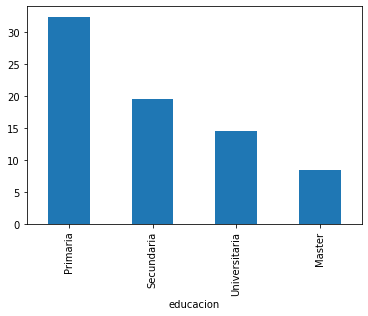

In [80]:
# analisis por educacion
temp = df.groupby('educacion').abandono.mean().sort_values(ascending=False)*100

# grafico de la tabla
temp.plot.bar()

La grafica nos indica que aquellos empleados con menor nivel academico son mas propensos a dejar la compañia.

<AxesSubplot:xlabel='estado_civil'>

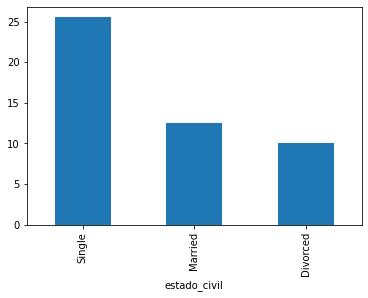

In [81]:
# analisis por estado civil
temp = df.groupby('estado_civil').abandono.mean().sort_values(ascending=False)*100
temp.plot.bar()

Los empleados que estan solteros son mas propensos a abandonar la compania.

<AxesSubplot:xlabel='horas_extra'>

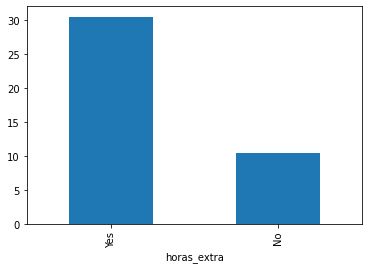

In [82]:
# analisis por horas extras
temp = df.groupby('horas_extra').abandono.mean().sort_values(ascending=False)*100
temp.plot.bar()

Los empleados que hacen horas extras tienden a abandonar la compania.

<AxesSubplot:xlabel='puesto'>

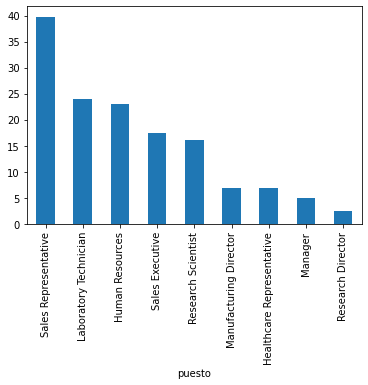

In [83]:
# analisis por puesto
temp = df.groupby('puesto').abandono.mean().sort_values(ascending=False)*100
temp.plot.bar()

El cargo dentro de la empresa que mas abandonan son los Representantes de venta, seguido de los Tecnico de Laboratorio y de Recursos Humanos. El perfil que menos abandona la compania son los Directores y Manager

### Por cual salario es el que mayormente los empleados abandonan la empresa?

<AxesSubplot:xlabel='abandono'>

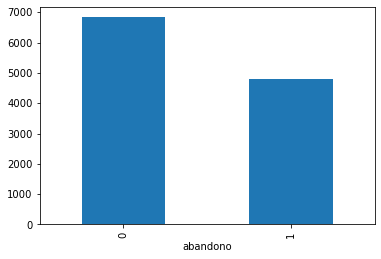

In [84]:
# Analisis 
temp = df.groupby('abandono').salario_mes.mean()
temp.plot.bar()

La grafica indica que mientras mayor sea el salario el empleado tiende a dejar menos la empresa

### Conclusiones

Los empleados que abandonan la empresa presentan las siguientes caracteristicas:

- Bajo nivel educativo, principalmente primaria.

- Son solteros.

- Trabajan como representantes de ventas

- Realizan horas extras.

- Bajo salario

### ¿Cuál es el impacto económico de este problema?

 Según el estudio de "Coast of Turnover" del Center for American Progress: 

El coste de la fuga de los empleados que ganan menos de 30,000 es del 16.1% de su salario (30000 x 16.1%)

El coste de la fuga de los empleados que ganan entre 30,000 y 50,000 es del 19.7% de su salario

El coste de la fuga de los empleados que ganan entre 50,000 y 75,000 es del 20.4% de su salario

El coste de la fuga de los empleados que ganan más de 75,000 es el 21% de su salario

In [85]:
# calculamos el salario anual del empleado
df['salario_anual'] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes', 'salario_anual']]

,salario_mes,salario_anual
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [86]:
# Calcular el impacto economico de cada empleado si deja la empresa

condiciones = [(df['salario_anual'] < 30000),
               (df['salario_anual'] >= 30000) & (df['salario_anual'] < 50000),
               (df['salario_anual'] >= 50000) & (df['salario_anual'] < 75000),
               (df['salario_anual'] >= 75000)]

resultados = [df.salario_anual*0.161,
              df.salario_anual*0.197,
              df.salario_anual*0.204,
              df.salario_anual*0.210,]

# aplicamos las condiciones 
df['impacto_abandono'] = np.select(condiciones, resultados, default=000)

# mostrar las variables de interes
df[['salario_mes', 'salario_anual', 'impacto_abandono']]

,salario_mes,salario_anual,impacto_abandono
id,,,
1,5993,71916,14670.864
2,5130,61560,12558.240
4,2090,25080,4037.880
5,2909,34908,6876.876
7,3468,41616,8198.352
...,...,...,...
2061,2571,30852,6077.844
2062,9991,119892,25177.320
2064,6142,73704,15035.616


### Cuanto nos ha costado el problema en el ultimo año?

In [87]:
# calculamos el costo del impacto de abandono en el ultimo ano
costo_total = df.loc[df.abandono == 1].impacto_abandono.sum()
print(f'El impacto economico por el abandono de emepleados en el ultimo ano es: {costo_total}')

El impacto economico por el abandono de emepleados en el ultimo ano es: 2719005.912


### Cuanto cuesta los empleados que no estan motivados?

In [88]:
# los empleados no motivados son aquellos con implicacion = baja
# Calculamos el costo para los empleados con implicacion baja
costo_no_motivado = df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()
print(f'El costo para la empresa de los empelados que no estan motivados podria ser de: {costo_no_motivado}')

El costo para la empresa de los empelados que no estan motivados podria ser de: 368672.688


### Cuanto nos ahorra reducir la fuga de empleados en un 10%?

In [89]:
ahorro = int(costo_total * 0.1)
print(f'La empresa puede ahorrar hasta {ahorro} al reducir la fuga de empleados en un 10%')

La empresa puede ahorrar hasta 271900 al reducir la fuga de empleados en un 10%


Esto sugiere a la empresa que puede gastar 271900 en diversas actividades que contribuyan a que la implicacion de los empleados mejore y asi poder conservarlos

### Cuantos representantes de ventas han abandonado?

In [90]:
total_repre = len(df.loc[df.puesto == 'Sales Representative'])
abandonos_repre = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1)])
porc_repre_abandono = abandonos_repre/total_repre
print(f'El porcentaje de abandono de Representantes de ventas es de {porc_repre_abandono*100}')

El porcentaje de abandono de Representantes de ventas es de 39.75903614457831


### Cuantos empleados podriamos perder este ano?

In [91]:
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
cant_abandono_actual = int(total_repre_actual*porc_repre_abandono)
print(f'En este ano se iran un total de {cant_abandono_actual} Representantes de Ventas')

En este ano se iran un total de 19 Representantes de Ventas


### Si se retiene el 30% de los empleados, cuanto supondria esto en dinero?

In [92]:
# queremos saber cuanto dinero supone para la empresa retener el 30% de los Representantes de ventas

# calculamos la cantidad de Representantes de ventas asociados al 30%
retencion = int(cant_abandono_actual * 0.3)

# calculamos el dinero que representa dicho 30%
ahorro = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0), 'impacto_abandono'].sum() * porc_repre_abandono * 0.3
print(f'Se puede retener {retencion} Representantes de Ventas lo que supone en dinero un total de {int(ahorro)}')

Se puede retener 5 Representantes de Ventas lo que supone en dinero un total de 37447


Recomendamos gastar 37447 en actividades de fidelizacion sobre esto empleados para que retenerlos

# Modelo de Machine Learning

In [93]:
# copiamos los datos preparados
df_ml = df.copy()

In [94]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empr

## Preparacion de datos para el Modelo

### Transformar variables categoricas a numericas

In [95]:
from sklearn.preprocessing import OneHotEncoder

# Categorias
cat = df_ml.select_dtypes('O')

# instanciamos
ohe = OneHotEncoder(sparse = False)

# Entrenamiento del modelo
ohe.fit(cat)

# Aplicamos la transformacion
cat_ohe = ohe.transform(cat)

# evaluamos las variables categoricas
cat_ohe = pd.DataFrame(cat_ohe, columns=ohe.get_feature_names_out(input_features=cat.columns)).reset_index(drop = True)


/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [96]:
# Verificamos que el entrenamiento se haya realizado
cat_ohe.head()

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Seleccion de Variables numericas

In [97]:
num = df.select_dtypes('number').reset_index(drop = True)

In [98]:
num

,edad,abandono,distancia_casa,nivel_laboral,salario_mes,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_anual,impacto_abandono
0,41,1,1,2,5993,8,11,0,8,0,6,0,5,71916,14670.864
1,49,0,8,2,5130,1,23,1,10,3,10,1,7,61560,12558.240
2,37,1,2,1,2090,6,15,0,7,3,0,0,0,25080,4037.880
3,33,0,3,1,2909,1,11,0,8,3,8,3,0,34908,6876.876
4,27,0,2,1,3468,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,23,2,2571,4,17,1,17,3,5,0,3,30852,6077.844
1466,39,0,6,3,9991,4,15,1,9,5,7,1,7,119892,25177.320
1467,27,0,4,2,6142,1,20,1,6,0,6,0,3,73704,15035.616
1468,49,0,2,2,5390,2,14,0,17,3,9,0,8,64680,13194.720


### Merge entre las variables numericas y categoricas

In [99]:
df_ml = pd.concat([cat_ohe, num], axis=1)
df_ml.head()

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_anual,impacto_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352


## Aplicacion de Modelo sobre los datos

In [100]:
# Separacion de los datos de entrenamiento y de test

# eliminamos del df la variable que queremos predecir
x = df_ml.drop(columns='abandono')

# creamos nuevamente la variable abandono con valores vacios que sera predecidos
y = df_ml['abandono']

In [101]:
# Separacion de datos de entrenamiento y de test

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)

In [102]:
# Utilizamos el Modelo de Arbol de Decision
from sklearn.tree import DecisionTreeClassifier

# instanciar modelo. Declaramos profundidad
ac = DecisionTreeClassifier(max_depth = 4)

# Entrenamos el modelo
ac.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=4)

In [103]:
# Resultados de la prediccion
pred = ac.predict_proba(test_x)[:,1]

# muestra la probabilidad de abandonar la empresa para 20 empleados
pred[:20]

array([0.05077263, 0.05077263, 0.27272727, 0.26923077, 0.09448819,
       0.27272727, 0.05077263, 0.27272727, 0.05077263, 0.05077263,
       0.06329114, 0.05077263, 0.09448819, 0.09448819, 0.05077263,
       0.05077263, 0.05077263, 0.27272727, 0.05077263, 0.05077263])

## Evaluacion de las predicciones del Modelo

In [104]:
# Verificamos que tan buenas son las predicciones del modelo
from sklearn.metrics import roc_auc_score

evaluacion = roc_auc_score(test_y, pred)

print(f'El porcentaje de evaluacion del modelo es del {evaluacion *100}')

El porcentaje de evaluacion del modelo es del 71.07610659439928


El porcentaje indica que las predicciones del modelo es bueno por lo que sus resultados son confiables.

## Diagrama del Arbol

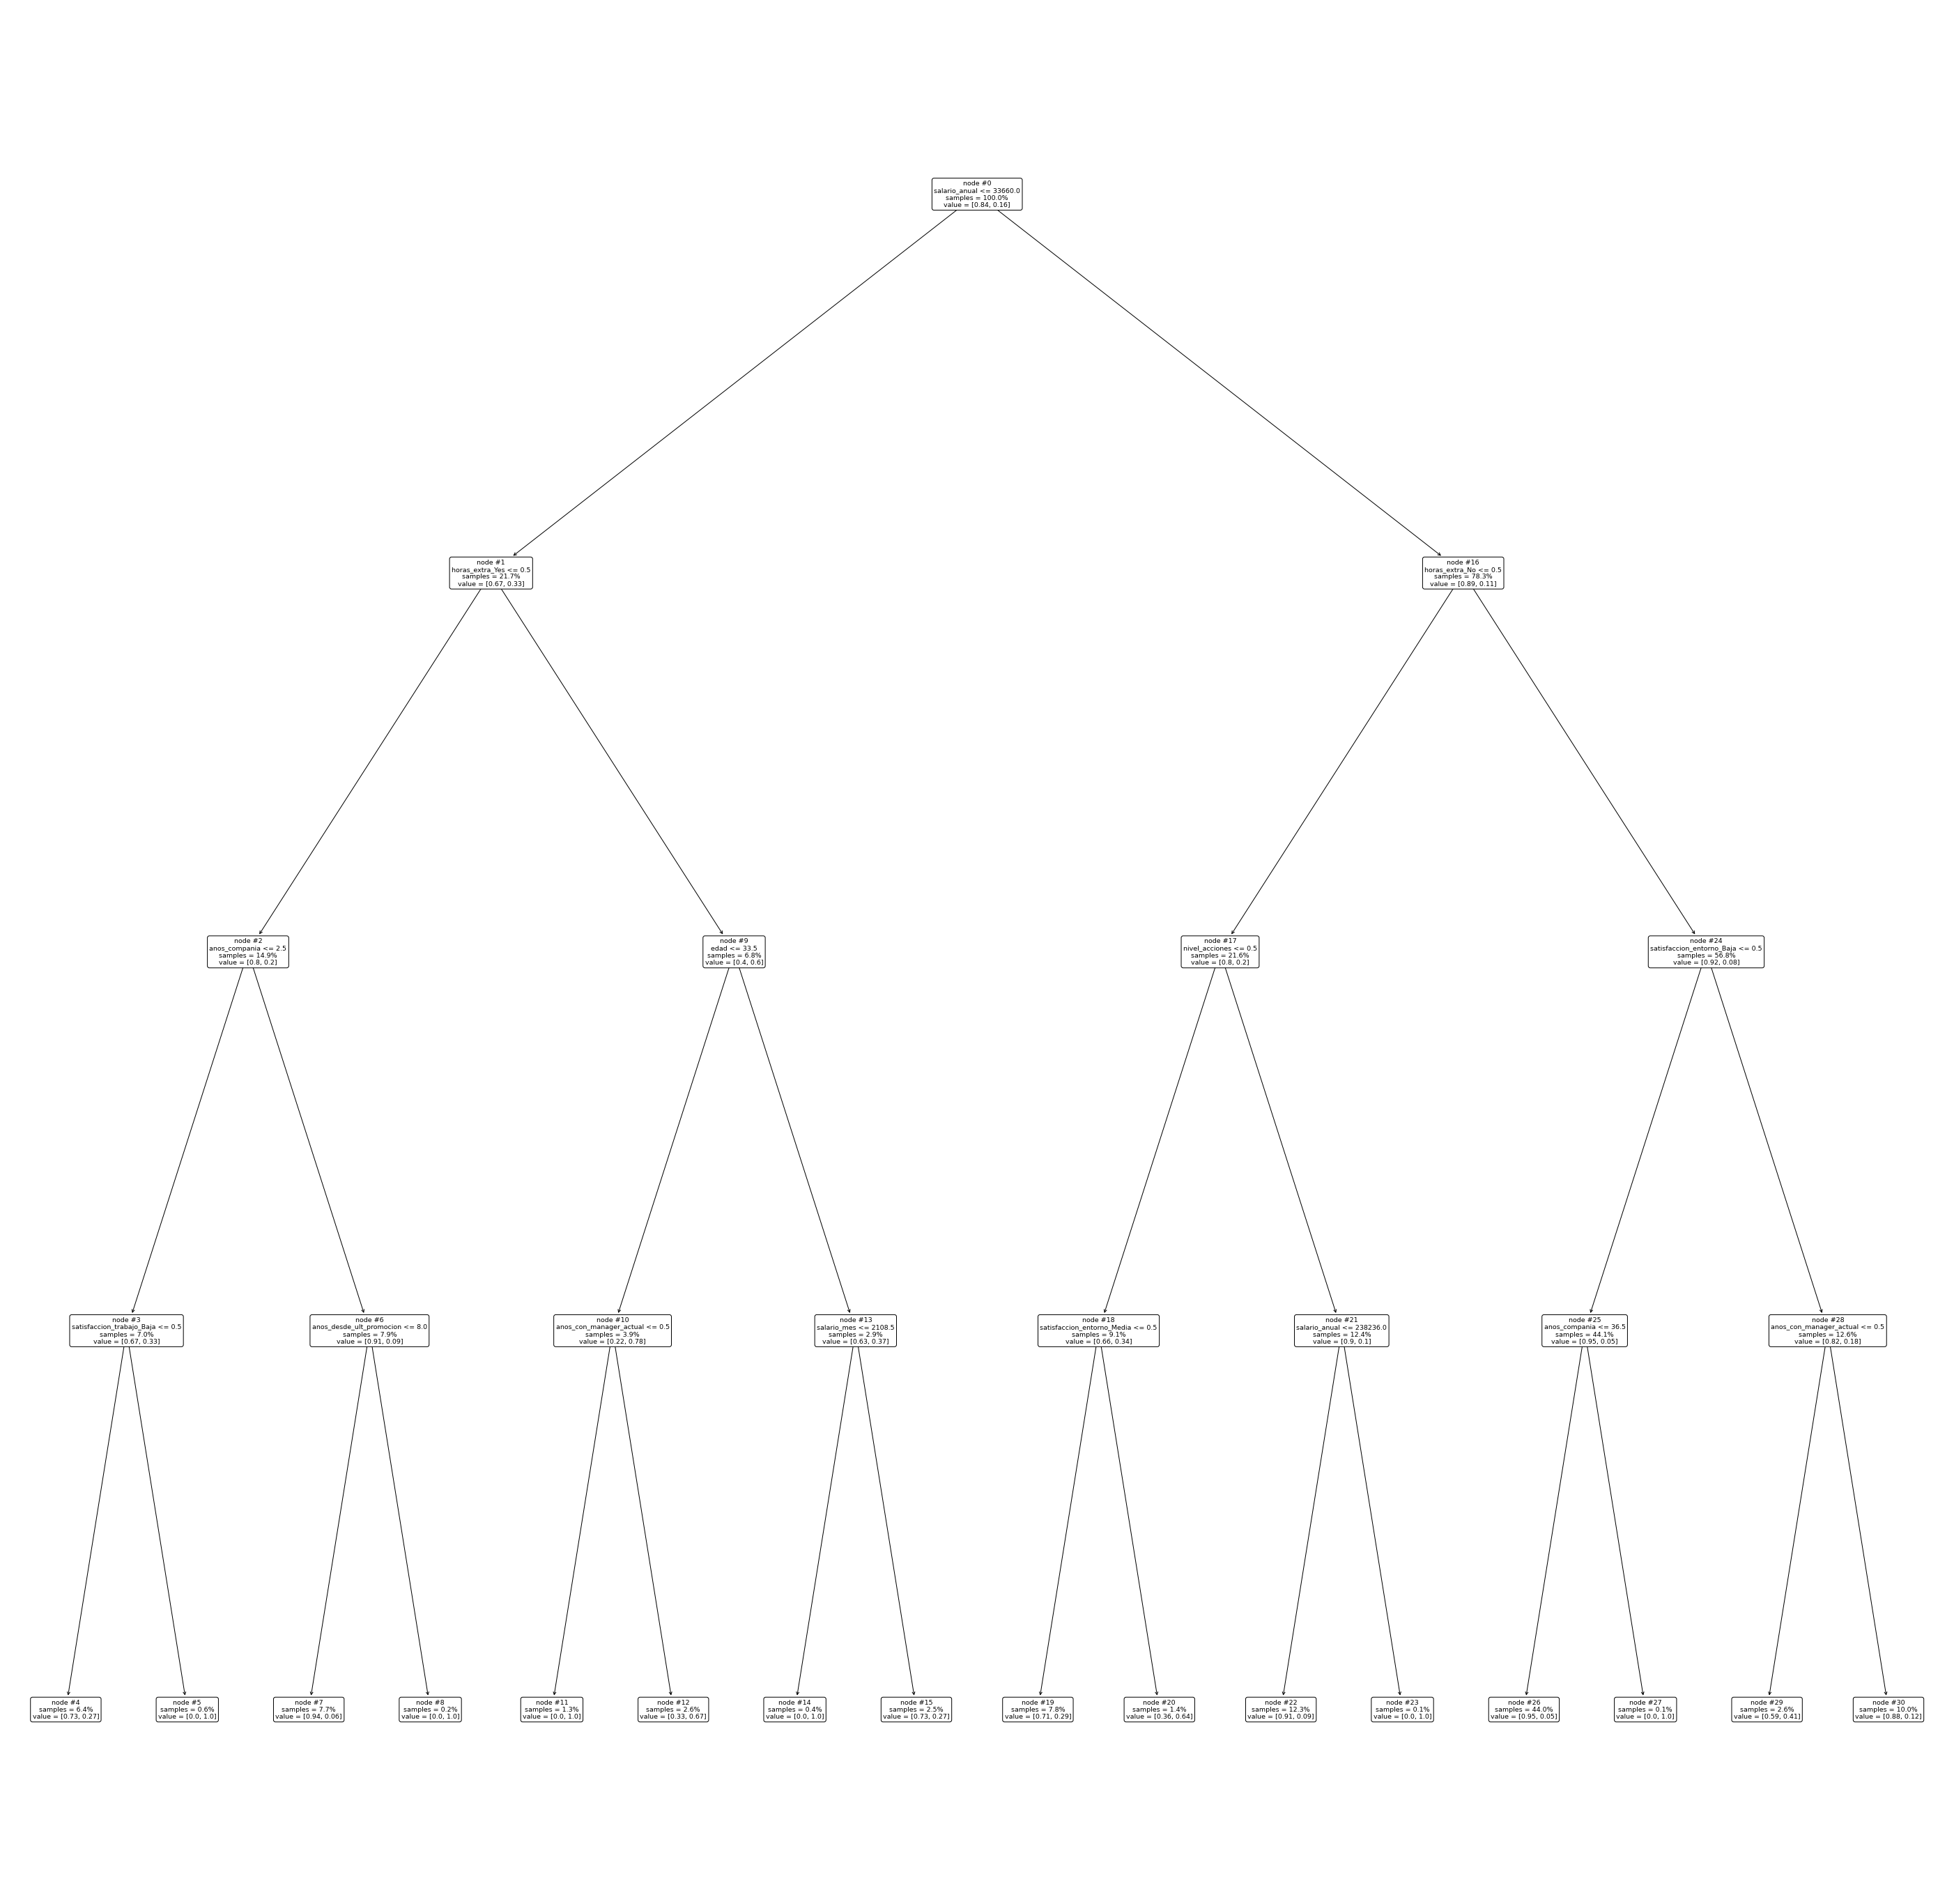

In [105]:
# Diagramar el arbol
from sklearn.tree import plot_tree

# grafico del arbol
plt.figure(figsize=(50,50))
plot_tree(ac,
          feature_names = test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

## Relevancia de las variables para el Modelo

<AxesSubplot:>

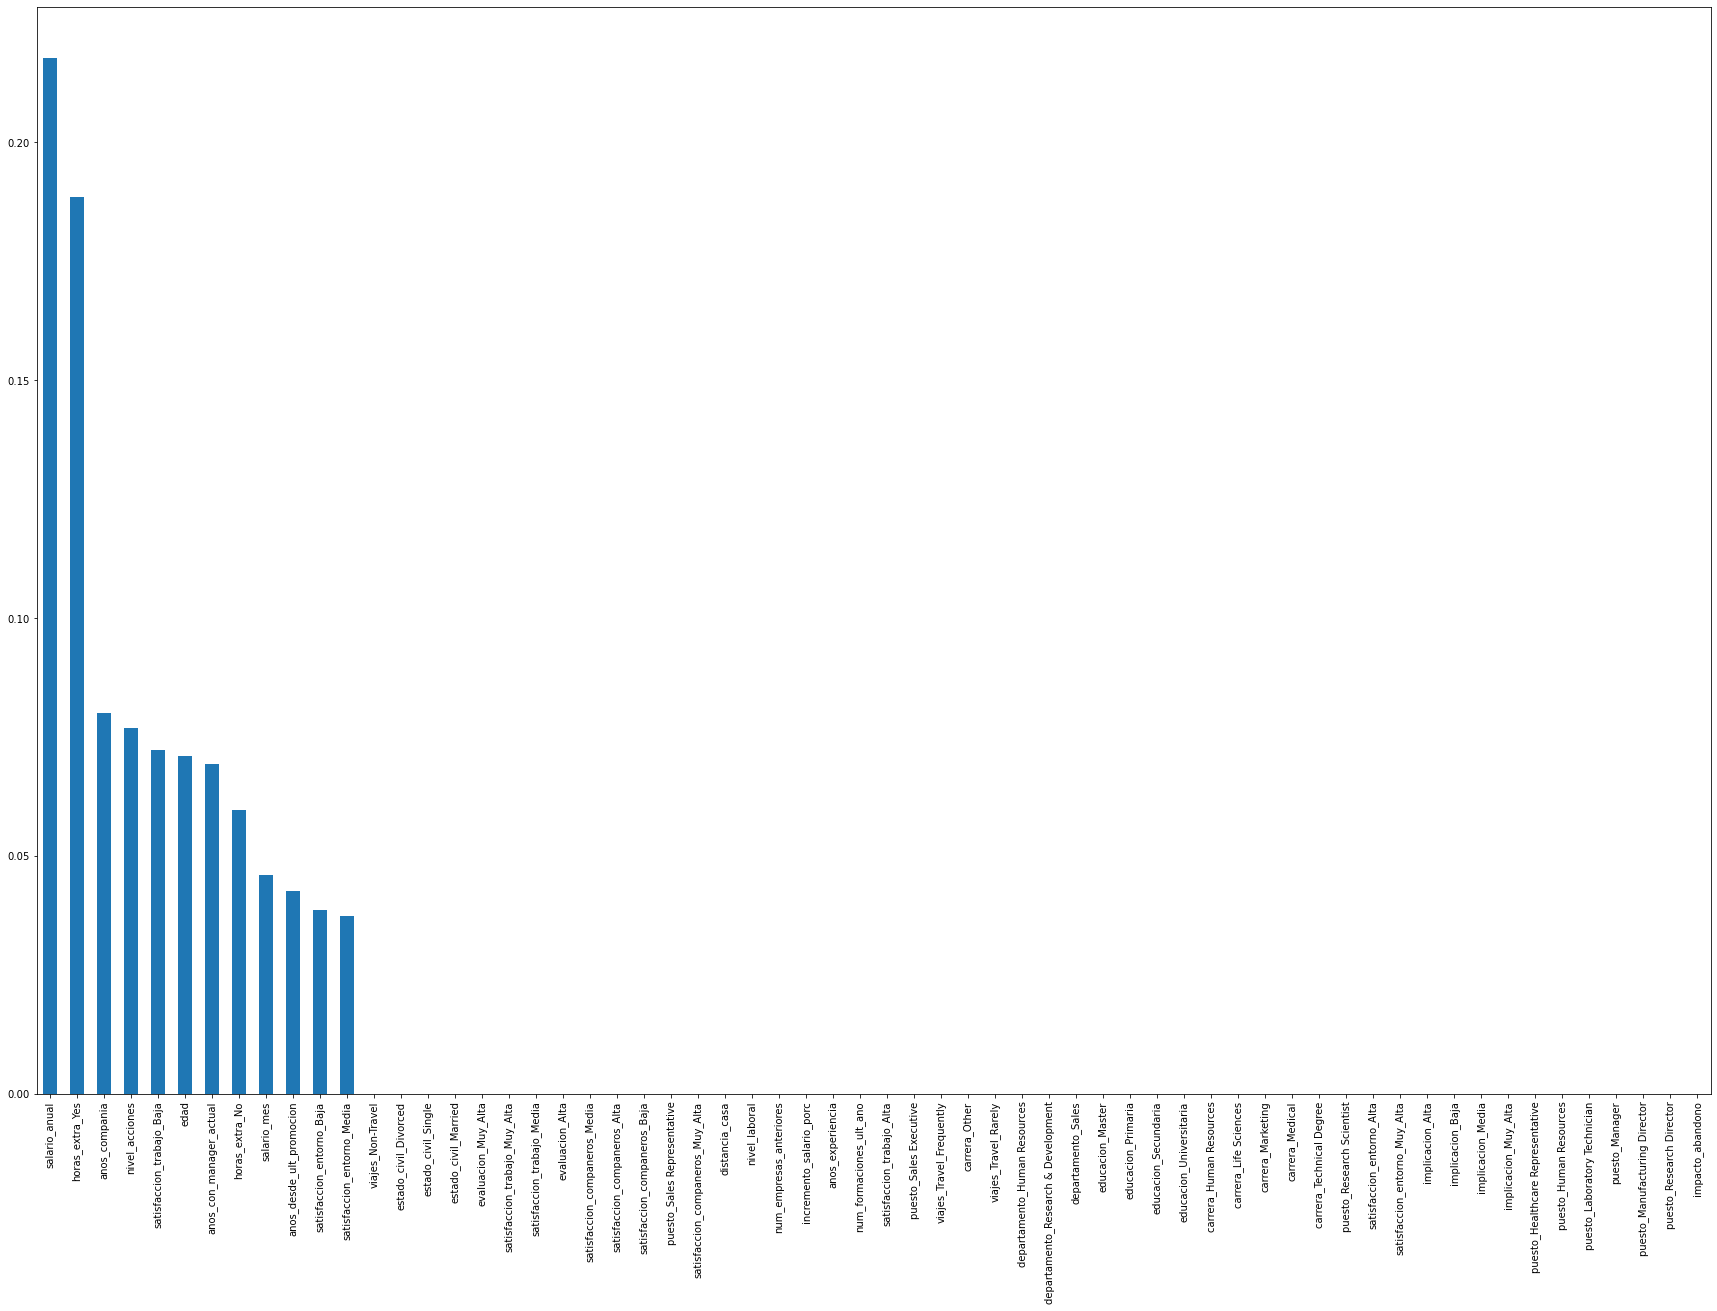

In [106]:
pd.Series(ac.feature_importances_, index=test_x.columns).sort_values(ascending=False).plot(kind = 'bar', figsize= (30,20))

## Scoring de abandono para todos los empleados

In [107]:
df['scoring_abandono'] = ac.predict_proba(df_ml.drop(columns='abandono'))[:,1]
df.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_anual,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.642857
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.050773
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,1.000000
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.287500
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.116505


In [108]:
# Top de los 10  primeros empleados que abandonan la empresa
df.sort_values(by = 'scoring_abandono', ascending=False)[0:10]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_anual,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1042,36,1,Travel_Rarely,Research & Development,16,Master,Life Sciences,Alta,Muy_Alta,1,...,Alta,0,18,1,17,15,14,32916,6484.452,1.0
816,29,1,Travel_Rarely,Research & Development,1,Secundaria,Life Sciences,Media,Media,1,...,Muy_Alta,1,1,1,1,0,0,27828,4480.308,1.0
45,24,1,Travel_Rarely,Research & Development,1,Universitaria,Medical,Media,Alta,1,...,Baja,1,6,2,2,2,0,27516,4430.076,1.0
1273,25,1,Travel_Frequently,Sales,24,Primaria,Life Sciences,Alta,Baja,1,...,Muy_Alta,0,1,4,1,1,0,13416,2159.976,1.0
1604,28,1,Travel_Rarely,Research & Development,24,Universitaria,Medical,Alta,Alta,1,...,Alta,3,1,3,1,0,0,28896,4652.256,1.0
1974,31,0,Travel_Rarely,Research & Development,2,Primaria,Medical,Muy_Alta,Baja,1,...,Alta,3,1,4,1,0,0,13548,2181.228,1.0
556,38,0,Travel_Frequently,Research & Development,2,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,1,1,3,1,0,0,20424,3288.264,1.0
555,34,1,Travel_Frequently,Sales,6,Primaria,Marketing,Muy_Alta,Baja,1,...,Muy_Alta,1,3,3,2,1,0,28212,4542.132,1.0
55,26,1,Travel_Rarely,Research & Development,25,Universitaria,Life Sciences,Baja,Baja,1,...,Alta,0,1,2,1,0,1,27516,4430.076,1.0


## Exportacion de los Resultados

In [109]:
df.to_excel('abandono_con_scoring.xlsx')